In [33]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 

In [34]:
np.random.seed(0)

In [53]:
n_pts = 500
X, Y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

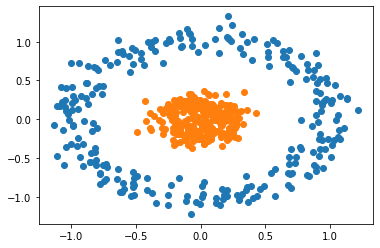

In [54]:
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

In [55]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [56]:
h = model.fit(x=X, y=Y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 749us/step - loss: 0.6984 - accuracy: 0.6440
Epoch 2/100
25/25 [==============================] - 0s 830us/step - loss: 0.6958 - accuracy: 0.4620
Epoch 3/100
25/25 [==============================] - 0s 880us/step - loss: 0.6948 - accuracy: 0.5760
Epoch 4/100
25/25 [==============================] - 0s 846us/step - loss: 0.6925 - accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 0s 833us/step - loss: 0.6930 - accuracy: 0.3440
Epoch 6/100
25/25 [==============================] - 0s 829us/step - loss: 0.6908 - accuracy: 0.6140
Epoch 7/100
25/25 [==============================] - 0s 847us/step - loss: 0.6890 - accuracy: 0.6980
Epoch 8/100
25/25 [==============================] - 0s 766us/step - loss: 0.6871 - accuracy: 0.7080
Epoch 9/100
25/25 [==============================] - 0s 921us/step - loss: 0.6841 - accuracy: 0.6880
Epoch 10/100
25/25 [==============================] - 0s 900us/step - loss: 0.6816 - accura

25/25 [==============================] - 0s 801us/step - loss: 0.0432 - accuracy: 1.0000
Epoch 82/100
25/25 [==============================] - 0s 799us/step - loss: 0.0421 - accuracy: 1.0000
Epoch 83/100
25/25 [==============================] - 0s 760us/step - loss: 0.0411 - accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 0s 640us/step - loss: 0.0401 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 0s 760us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 86/100
25/25 [==============================] - 0s 600us/step - loss: 0.0381 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 0s 783us/step - loss: 0.0373 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 0s 760us/step - loss: 0.0363 - accuracy: 1.0000
Epoch 89/100
25/25 [==============================] - 0s 622us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 0s 754us/step - loss: 0.0347 - accuracy: 

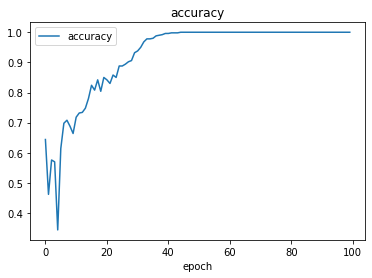

In [57]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.title('accuracy')
plt.legend(['accuracy'])

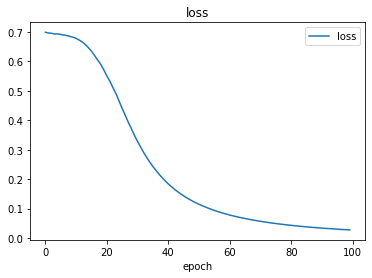

In [58]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.title('loss')
plt.legend(['loss'])

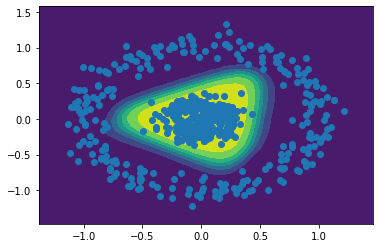

In [59]:
def plot_decision_boundary(X, Y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

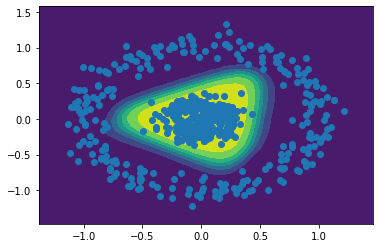

In [60]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.98933035]]


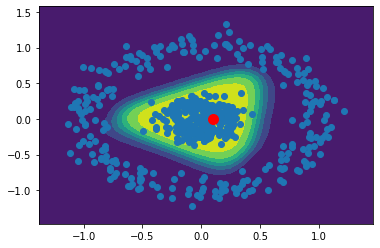

In [62]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x, y = 0.1, 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', color='r', markersize=10)
print("Prediction is: ", prediction)